# Predicting Stroke
Author: Necky Tran <br>
Date: 06/06/23

### Table of Contents

1. [Introduction](#Introduction)
2. [Wrangling](#Wrangling)
3. [Statistical Analysis](#Statistical_Analysis)
4. [Logistic Regression](#Logistic)
5. [Summary](#Summary)

# Introduction
This notebook contains an analysis of a of a US Health Insurance Dataset. The dataset is sourced from Kaggle:
- 'https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset'

The dataset was cleaned and analyzed to generate a logistic model to predict likelyhood of stroke.

In [1]:
# load standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in and check data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The data has been successfully loaded


# Wrangling
- Exploratory Data Analysis
    - Find which columns need to be converted into numeric
    - Deal with NaNs and Duplicates

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 5110 rows and 12 columns

The [bmi] column has some missing values, we can explore this further 

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Check which columns have NaN values
#.isna() returns a dataframe of T/F for any element that is missing
#.any() tells us if there are any Trues in that column
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [6]:
df.isna().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

The BMI column has some NAs, about 4% of the total data. Explore futher to make a decision one whether to drop or impute <br>

In [7]:
# find rows of data where bmi is missing
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


There are 201 rows where the bmi value is missing

In [8]:
# explore missing data, 
df[df['bmi'].isna()].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,23171.109453,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,20882.483120,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,67.000000,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,4062.000000,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,18234.000000,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,37937.000000,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,72231.000000,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


 28.89 is the mean BMI
 28.1 is the median BMI


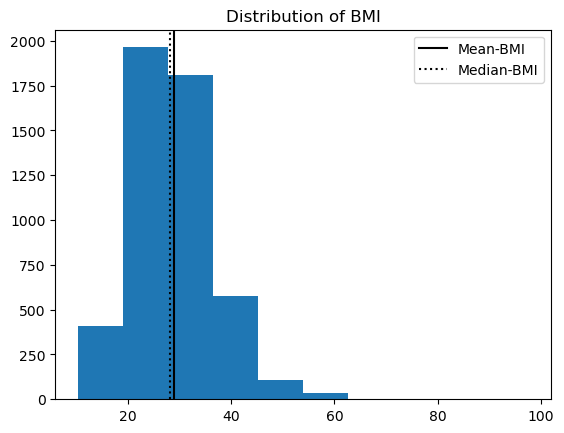

In [9]:
# histogram of two categories
plt.hist(df['bmi'])
plt.axvline(df['bmi'].mean(),linestyle = 'solid',label = "Mean-BMI", color = 'black')
plt.axvline(df['bmi'].median(),linestyle = 'dotted',label = "Median-BMI", color = 'black')
plt.title('Distribution of BMI')
plt.legend(loc='upper right');


print(f" {round(df['bmi'].mean(), 2)} is the mean BMI")

print(f" {df['bmi'].median()} is the median BMI")

The mean and median BMI are very similar which means this data is symetrically distributed around a central value. There are no extreme outliers pulling the mean away from the median. It would be appropriate to use a mean imputation on the missing data.

In [10]:
df.duplicated().sum()

0

There are no duplicated Rows in the Dataset

In [11]:
# mean imputation
df['bmi'] = np.where(df['bmi'].isna(), 28, df['bmi'])

In [12]:
# check
df['bmi'].isna().sum()

0

The missing values have been successfully imputed with the mean.

Start feature engineering

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
# Get a list of all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
print(df_encoded)

         id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0      9046  67.0             0              1             228.69  36.6   
1     51676  61.0             0              0             202.21  28.0   
2     31112  80.0             0              1             105.92  32.5   
3     60182  49.0             0              0             171.23  34.4   
4      1665  79.0             1              0             174.12  24.0   
...     ...   ...           ...            ...                ...   ...   
5105  18234  80.0             1              0              83.75  28.0   
5106  44873  81.0             0              0             125.20  40.0   
5107  19723  35.0             0              0              82.99  30.6   
5108  37544  51.0             0              0             166.29  25.6   
5109  44679  44.0             0              0              85.28  26.2   

      stroke  gender_Male  gender_Other  ever_married_Yes  \
0          1            1             

In [19]:
df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.0,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


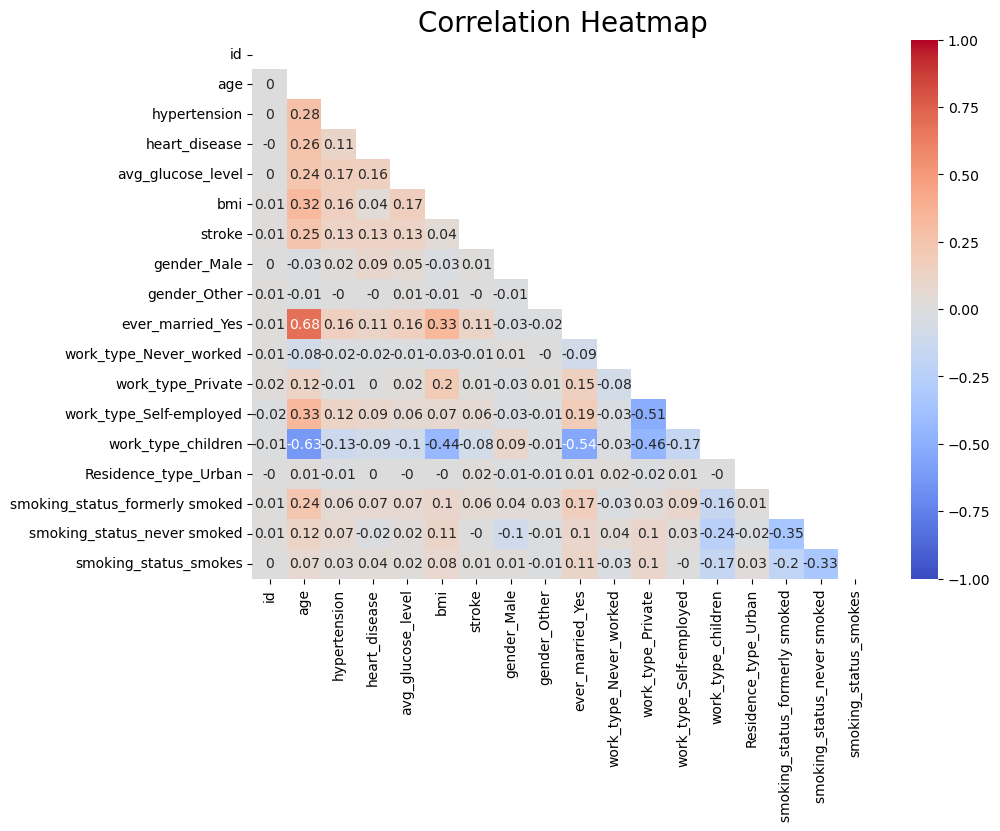

In [23]:
# heatmap 
plt.figure(figsize=(10,7))
sns.heatmap(df_encoded.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(df_encoded.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

In [24]:
import statsmodels.api as sm

y = df_encoded['stroke']
x = df_encoded.drop('stroke', axis=1)

# !! Add constant to our X !!
X_0 = sm.add_constant(x)



In [25]:
# Instantiate the logistic regression model 
logreg_0 = sm.Logit(y, X_0)

# Fit the model (this returns a separate object with the parameters)
logreg_results_0 = logreg_0.fit()

# Display the results 
logreg_results_0.summary()

         Current function value: 0.154688
         Iterations: 35


c:\Users\trann\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5092
Method:                           MLE   Df Model:                           17
Date:                Tue, 15 Aug 2023   Pseudo R-squ.:                  0.2057
Time:                        20:33:21   Log-Likelihood:                -790.46
converged:                      False   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 1.950e-76
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.8479      0.619    -12.686      0.000      -9.060      -6.635
id                              1.573e-06   3.22e-06      0.489      0.625   -4.74e-06    7.89e-06
age                                0.0747      0.006     12.817      0.000       0.063       0.086
hypertension                       0.4020      0.165      2.435      0.015       0.078       0.726
heart_disease                      0.2782      0.191      1.454      0.146      -0.097       0.653
avg_glucose_level                  0.0041      0.001      3.379      0.001       0.002       0.006
bmi                                0.0008      0.011      0.073      0.942      -0.021       0.023
gender_Male                        0.0120      0.142      0.085      0.932      -0.266       0.290
gender_Other                      -8.1709    725.904     -0.011      0.991   -1430.916    1414.574
ever_married_Yes                  -0.1851      0.225     -0.821      0.412      -0.627       0.257
work_type_Never_worked           -19.5782   8.32e+04     -0.000      1.000   -1.63e+05    1.63e+05
work_type_Private                  0.1437      0.207      0.695      0.487      -0.261       0.549
work_type_Self-employed           -0.2300      0.234     -0.983      0.326      -0.689       0.229
work_type_children                 0.9405      0.836      1.125      0.260      -0.698       2.579
Residence_type_Urban               0.0852      0.138      0.616      0.538      -0.186       0.356
smoking_status_formerly smoked     0.0702      0.208      0.337      0.736      -0.338       0.479
smoking_status_never smoked       -0.1372      0.198     -0.692      0.489      -0.526       0.251
smoking_status_smokes              0.1813      0.234      0.776      0.438      -0.277       0.639
==================================================================================================
"""